# Logistic Regression
In this part of the exercise, we build a logistic regression model to predict whether a student gets admitted into a university. For each training example, we have the applicant’s scores on two exams and the admissions decision.

### Visualising the Data

In [58]:
import numpy as np

data = np.loadtxt('./ex2/ex2data1.txt', dtype='float', delimiter=',')

In [59]:
import matplotlib.pyplot as plt

def plotData(X,y,title,xlabel,ylabel):
    pos = np.where(y==1)
    neg = np.where(y==0)
    plt.title(title)
    plt.scatter(X[pos,0],X[pos,1],label='Admitted')
    plt.scatter(X[neg,0],X[neg,1],label='Not Admitted')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

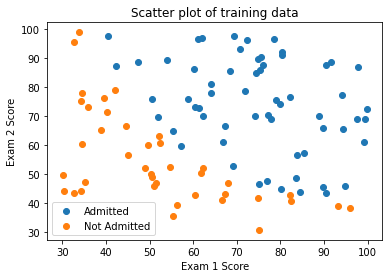

In [60]:
plotData(data[:,:-1],data[:,-1],'Scatter plot of training data','Exam 1 Score','Exam 2 Score')
plt.show()

### Cost function and gradient

In [61]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def computeCost(theta,X,y):
    hx = sigmoid(np.matmul(X,theta))
    J = np.sum(-np.multiply(y,np.log(hx)) - np.multiply((1-y),np.log(1-hx)))/len(y)
    return J

n = len(data)
X = data[:,:-1]
X = np.hstack((np.ones((n,1)), X))
y = data[:,-1]
y = y[:,np.newaxis]

_,b = X.shape
theta = np.zeros((b,1))

print('Initial value of Cost Function=',computeCost(theta,X,y))

Initial value of Cost Function= 0.6931471805599453


### Finding optimal parameters(theta) using fmin_tnc

In [62]:
from scipy.optimize import fmin_tnc

def gradient(theta,X,y):
    hx = sigmoid(np.matmul(X,theta))
    return (1/n) * np.dot(hx - y, X)

optParam = fmin_tnc(func=computeCost, x0=theta.flatten(), fprime=gradient, args=(X, y.flatten()))
theta = optParam[0][:,np.newaxis]

### Evaluating logistic regression

In [63]:
def accuracy(X, y, theta, threshold):
    y_hat = sigmoid(np.matmul(X, theta)) >= threshold
    return np.mean(y_hat == y) * 100

print('Final value of Cost Function=',computeCost(theta,X,y))
print('Model Accuracy=',accuracy(X, y, theta, 0.5),'%')

Final value of Cost Function= 0.2034977015894742
Model Accuracy= 89.0 %


### Plotting the decision boundary

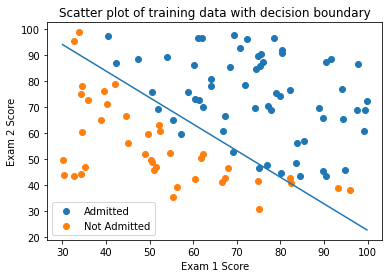

In [64]:
# Decision Boundary ---> woxo + w1x1 + w2x2 = 0
# x2(or y) = - (woxo + w1x1)/(w2)
x_range = np.linspace(np.min(X[:,1]), np.max(X[:,1]), num=10)
y_range = -1/theta[2][0]*(theta[0][0] + np.dot(theta[1][0],x_range))

plotData(data[:,:-1],data[:,-1],'Scatter plot of training data with decision boundary','Exam 1 Score','Exam 2 Score')
plt.plot(x_range, y_range)
plt.show()

# Regularized logistic regression
In this part of the exercise, we implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA).

### Visualising the Data

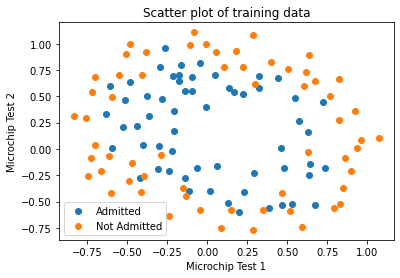

In [65]:
data = np.loadtxt('./ex2/ex2data2.txt', dtype='float', delimiter=',')
plotData(data[:,:-1],data[:,-1],'Scatter plot of training data','Microchip Test 1','Microchip Test 2')
plt.show()

### Feature Mapping
One way to ﬁt the data better is to create more features from each data point. We will map the features into all polynomial terms of x1 and x2 up to the sixth power. As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classiﬁer trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

In [66]:
def mapFeature(x1,x2,degree):
    eqn = np.ones(n)[:,np.newaxis]
    for i in range (1,degree+1):
        for j in range (i+1):
            term = (x1**(i-j) * x2**j)[:,np.newaxis]
            eqn = np.hstack((eqn,term))
    return eqn

n = len(data)
X = data[:,:-1]
y = data[:,-1][:,np.newaxis]
degree = 6

X = mapFeature(X[:,0],X[:,1],degree)

### Cost Function and Optimization (gradient descent)

Initial value of Cost Function= 0.6900061276708442
Final value of Cost Function= 0.5291084649482245


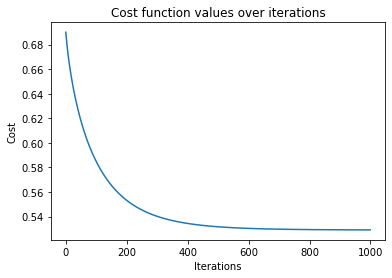

In [67]:
def computeCostReg(theta,X,y,lambda_):
    hx = sigmoid(np.matmul(X,theta))
    J = (-1/n) * np.sum(np.matmul(y.T,np.log(hx)) + np.matmul((1-y).T,np.log(1-hx))) + (lambda_/(2*n)) * np.sum(theta[1:]**2)
    return J

def gradientReg(theta,X,y,lambda_):
    hx = sigmoid(np.matmul(X,theta))
    grad = (1/n) * np.matmul(X.T, hx - y) + (lambda_/n) * theta
    grad[0] = grad[0] - (lambda_/n) * theta[0]
    return grad

def gradientDescentReg(theta,X,y,lambda_,learningRate,maxIterations):
    cost = np.zeros(maxIterations)
    for i in range(maxIterations):
        grad = gradientReg(theta,X,y,lambda_)
        theta = theta - learningRate*grad
        cost[i] = computeCostReg(theta,X,y,lambda_)
    return theta,cost

lambda_ = 1
learningRate = 0.25
maxIterations = 1000
theta = np.zeros((X.shape[1],1))
theta,cost = gradientDescentReg(theta,X,y,lambda_,learningRate,maxIterations)

print('Initial value of Cost Function=',cost[0])
print('Final value of Cost Function=',cost[-1])

# Cost Function Trend
plt.plot(np.arange(maxIterations),cost)
plt.title('Cost function values over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Evaluating Regularized Logistic Regression

In [68]:
threshold = 0.5
print('Model Accuracy=',accuracy(X, y, theta, threshold),'%')

Model Accuracy= 83.05084745762711 %


### Plotting the decision boundary

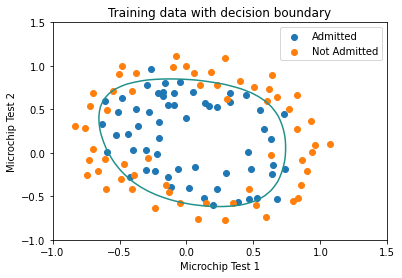

In [69]:
def mapFeatureContour(x1,x2,degree):
    eqn = np.ones(1)
    for i in range (1,degree+1):
        for j in range (i+1):
            term = (x1**(i-j) * x2**j)
            eqn = np.hstack((eqn,term))
    return eqn

# Decision Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureContour(u[i], v[j], degree), theta)
        
plotData(data[:,:-1],data[:,-1],'Training data with decision boundary','Microchip Test 1','Microchip Test 2')
plt.contour(u,v,z.T,0)
plt.show()